In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Contoh dataset (buat dummy data)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100)

# Evaluasi
print("Prediksi:", model.predict(X_test))

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.2210
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.2156
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2103
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2050
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1999
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1949
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1900
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1851
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1804
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1757
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1711
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1666
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1622
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1578
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1536
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━

Tugas 4:
- Ubah learning rate.
- Bandingkan hasil loss.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Dataset dummy
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler_x = StandardScaler()
scaler_y = StandardScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def train_model(lr):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mse')

    history = model.fit(X_train, y_train, epochs=100, verbose=0)
    final_loss = history.history['loss'][-1]

    print(f"LR {lr} → Final Loss: {final_loss}")
    return final_loss

# Jalankan tiga percobaan
loss_1 = train_model(0.0001)
loss_2 = train_model(0.001)
loss_3 = train_model(0.01)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


LR 0.0001 → Final Loss: 2.3684468269348145
LR 0.001 → Final Loss: 0.10964494943618774
LR 0.01 → Final Loss: 0.0009129148093052208


Perbandingan
- Learning rate 0,0001 bersifat Lambat, underfitting dengan nilai Loss: 2.3684468269348145
- Learning rate 0,001 bersifat Stabil, terbaik dengan nilai Loss: 0.10964494943618774
- Learning rate 0,01 bersifat Bisa bagus atau naik dengan nilai Loss: 0.0009129148093052208

LR terlalu kecil
- Training lama
- Loss turun lambat
- Bisa terjebak di local plateau

LR pas / ideal
- Loss turun stabil dan cepat

LR terlalu besar
- Loss naik turun
- Model gagal menemukan minimum
- Bisa divergen = loss malah membesar

Shape: (20640, 8) | Target: harga median rumah di California


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


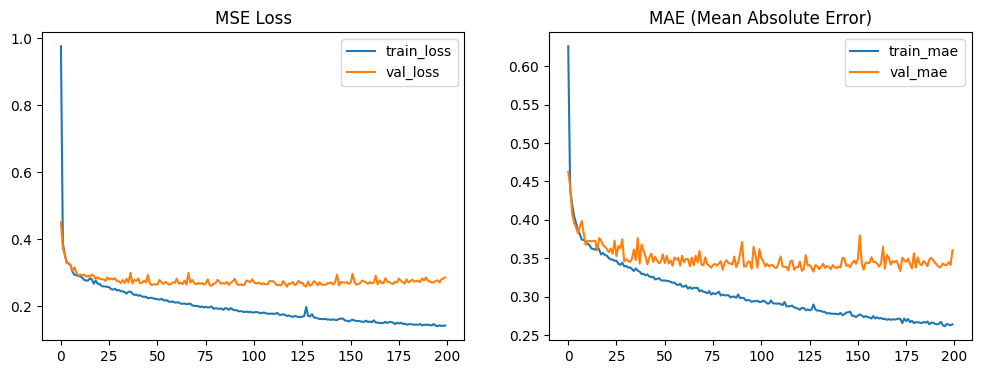

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RMSE: 0.535
MAE : 0.360 (dalam ratusan ribu USD)
Contoh: prediksi meleset rata-rata $36,044 dari harga rumah sebenarnya


In [4]:
# MLP Regresi dengan dataset yang aman dan tersedia (California Housing)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing   # <-- GANTI INI SAJA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Load dataset baru
data = fetch_california_housing()
X = data.data
y = data.target  # harga rumah dalam ratusan ribu dolar

print(f"Shape: {X.shape} | Target: harga median rumah di California")

# 2. Preprocess
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.2, random_state=42)

# 3. Build model (sedikit lebih besar karena dataset lebih kompleks)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # regresi → 1 output tanpa aktivasi
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

# 4. Train
h = model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=200,
              batch_size=64,   # batch lebih besar karena data lebih banyak (20k+ sampel)
              verbose=0)

# 5. Plot loss & MAE
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.title('MSE Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(h.history['mae'], label='train_mae')
plt.plot(h.history['val_mae'], label='val_mae')
plt.title('MAE (Mean Absolute Error)')
plt.legend()
plt.show()

# 6. Evaluasi akhir
from sklearn.metrics import mean_squared_error, mean_absolute_error

pred = model.predict(X_val).flatten()
rmse = np.sqrt(mean_squared_error(y_val, pred))
mae = mean_absolute_error(y_val, pred)

print(f"RMSE: {rmse:.3f}")
print(f"MAE : {mae:.3f} (dalam ratusan ribu USD)")
print(f"Contoh: prediksi meleset rata-rata ${mae*100_000:,.0f} dari harga rumah sebenarnya")